In [2]:
pip install rasterio webcolors numpy opencv-python matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


C:\Users\ncbcp\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


C:\Users\ncbcp\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [3]:
#Must be imported
import os
import cv2
import webcolors
import numpy as np
import geopandas as gpd
import rasterio.features
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from shapely.geometry import Polygon, shape

Unique colors in the image: [[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [255 255 253]
 [255 255 254]
 [255 255 255]]
Desired color: (40, 106, 9)
Number of pixels matching desired color with tolerance: 136815
Desired color: (113, 160, 90)
Number of pixels matching desired color with tolerance: 14289
Number of geometries: 6932
Shapefile saved as: ./Updated_Shapefiles/Green_Calcite.shp


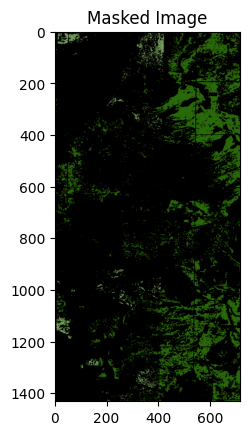

In [5]:
# Run this to get the Unique colors in the image, Desired color, Mask shape of the desired color,
# Number of pixels matching desired color,  shape file of a geotiff image based on a specific color, Number of geometries,
# Getting the shape file of the Geotiff
import numpy as np
import geopandas as gpd
from shapely.geometry import shape
import rasterio
import rasterio.features
import matplotlib.pyplot as plt

# Load the GeoTIFF image
image_path = "C:/Users/ncbcp/Downloads/Scene-2_Clip/Scene-2_Clip.tif"
with rasterio.open(image_path) as src:
    image = src.read([1, 2, 3])  # Read the first three bands (assuming RGB)
    transform = src.transform
    crs = src.crs

# Transpose the image for easier handling of pixel colors
image_transposed = image.transpose(1, 2, 0)

# Inspect unique colors
unique_colors = np.unique(image_transposed.reshape(-1, image_transposed.shape[2]), axis=0)
print(f"Unique colors in the image: {unique_colors}")

# Function to create a mask with color tolerance
def create_color_mask(image, desired_color, tolerance=10):
    desired_color = np.array(desired_color)  # Convert tuple to NumPy array
    lower_bound = np.maximum(desired_color - tolerance, 0)
    upper_bound = np.minimum(desired_color + tolerance, 255)
    mask = np.all((image >= lower_bound) & (image <= upper_bound), axis=-1)
    return mask

# Desired colors and tolerance
desired_colors = [(40, 106, 9), (113, 160, 90)]  # You can add more colors to this list
tolerance = 10

# Initialize a combined mask for all desired colors
combined_mask = np.zeros(image_transposed.shape[:2], dtype=bool)

for desired_color in desired_colors:
    # Create mask with tolerance
    mask = create_color_mask(image_transposed, desired_color, tolerance)
    combined_mask = combined_mask | mask

    # Debugging: Check if the mask is created correctly
    print(f"Desired color: {desired_color}")
    print("Number of pixels matching desired color with tolerance:", np.sum(mask))

# Create polygons for each segment (where any of the desired colors exist)
shapes = rasterio.features.shapes(combined_mask.astype(np.int16), transform=transform)

# Create a GeoDataFrame from the shapes
geoms = []
for geom, val in shapes:
    if val:  # We only want polygons where the mask is True
        geoms.append(shape(geom))

# Debugging: Check if any geometries were created
print("Number of geometries:", len(geoms))

# Create GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': geoms}, crs=crs)

# Save the GeoDataFrame as a shapefile
output_shapefile = './Updated_Shapefiles/Green_Calcite.shp'
gdf.to_file(output_shapefile)

print(f'Shapefile saved as: {output_shapefile}')

# Visualization: Apply combined mask to the original image
masked_image = np.copy(image_transposed)
masked_image[~combined_mask] = [0, 0, 0]  # Set non-matching pixels to black

# Display the masked image
plt.imshow(masked_image)
plt.title('Masked Image')
plt.show()


In [ ]:
# # Run this for Colors list and Visuals
# # Load the image
# image_path = '/content/clipped.tif'
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Reshape the image to be a list of pixels
# pixels = image.reshape((-1, 3))

# # Number of colors to identify
# num_colors =100

# # Use KMeans to cluster the pixel intensities
# kmeans = KMeans(n_clusters=num_colors)
# kmeans.fit(pixels)

# # Get the colors
# colors = kmeans.cluster_centers_
# labels = kmeans.labels_

# # Convert to integer
# colors = colors.round(0).astype(int)

# # Function to get color name
# def get_color_name(rgb_tuple):
#     try:
#         closest_name = webcolors.rgb_to_name(rgb_tuple)
#     except ValueError:
#         closest_name = None
#     return closest_name

# # Get color names
# color_names = [get_color_name(tuple(color)) for color in colors]

# # Display the grid of colors with names
# def plot_colors_grid_with_names(colors, color_names):
#     num_colors = len(colors)
#     grid_width = int(np.ceil(np.sqrt(num_colors)))
#     grid_height = int(np.ceil(num_colors / grid_width))

#     fig, ax = plt.subplots(grid_height, grid_width, figsize=(10, 10))

#     for i, (color, name) in enumerate(zip(colors, color_names)):
#         y = i // grid_width
#         x = i % grid_width
#         ax[y, x].imshow([[color]])
#         ax[y, x].axis('off')
#         ax[y, x].set_title(name, fontsize=10)

#     # Remove empty subplots
#     for j in range(i + 1, grid_width * grid_height):
#         y = j // grid_width
#         x = j % grid_width
#         fig.delaxes(ax[y, x])

#     plt.tight_layout()
#     plt.show()

# # Display the grid of colors with names
# plot_colors_grid_with_names(colors, color_names)

# # Print the RGB values and names of the colors
# for i, (color, name) in enumerate(zip(colors, color_names)):
#     print(f'Color {i + 1}: RGB {tuple(color)} - Name: {name}')
